In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/data_0.csv',  parse_dates=['from_date', 'to_date'])

In [ ]:
data.head()

,id,gender,age,count,from_date,to_date
0,0,man,young,3,2024-01-08 08:00:00,2024-01-08 09:00:00
1,1,man,adult,28,2024-01-08 08:00:00,2024-01-08 09:00:00
2,2,man,old,10,2024-01-08 08:00:00,2024-01-08 09:00:00
3,3,woman,young,5,2024-01-08 08:00:00,2024-01-08 09:00:00
4,4,woman,adult,44,2024-01-08 08:00:00,2024-01-08 09:00:00


In [ ]:
# Changement de data type en objet
data['Date'] = data['from_date'].dt.date

In [ ]:
data.tail()

,id,gender,age,count,from_date,to_date,Date
667,625,man,adult,162,2024-01-15 21:00:00,2024-01-15 22:00:00,2024-01-15
668,626,man,old,62,2024-01-15 21:00:00,2024-01-15 22:00:00,2024-01-15
669,627,woman,young,33,2024-01-15 21:00:00,2024-01-15 22:00:00,2024-01-15
670,628,woman,adult,262,2024-01-15 21:00:00,2024-01-15 22:00:00,2024-01-15
671,629,woman,old,101,2024-01-15 21:00:00,2024-01-15 22:00:00,2024-01-15


In [ ]:
data.info()
# On peut voir qu'il n'y a pas de null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         672 non-null    int64         
 1   gender     672 non-null    object        
 2   age        672 non-null    object        
 3   count      672 non-null    int64         
 4   from_date  672 non-null    datetime64[ns]
 5   to_date    672 non-null    datetime64[ns]
 6   Date       672 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 36.9+ KB


In [ ]:
data.nunique()

id           630
gender         2
age            3
count        328
from_date    112
to_date      112
Date           8
dtype: int64

In [ ]:
data.isnull().sum()

id           0
gender       0
age          0
count        0
from_date    0
to_date      0
Date         0
dtype: int64

In [ ]:
data['count'] = data['count'].astype(int)

In [ ]:
daily_visits = data.groupby('Date').size()

In [ ]:
gender_repartition = data.groupby(['Date', 'gender']).size().unstack()

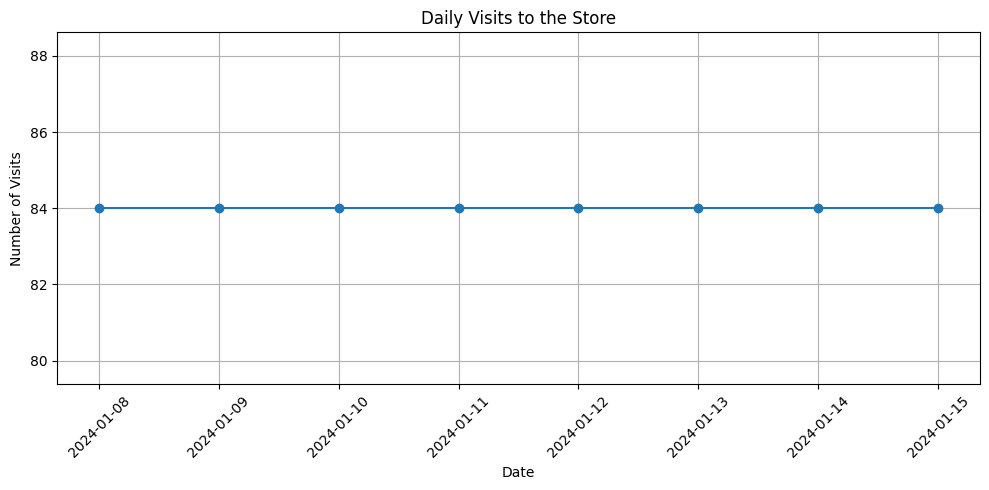

In [ ]:
# Visualisation des visites quotidiennes au magasin
plt.figure(figsize=(10, 5))
plt.plot(daily_visits.index, daily_visits.values, marker='o')
plt.title('Daily Visits to the Store')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

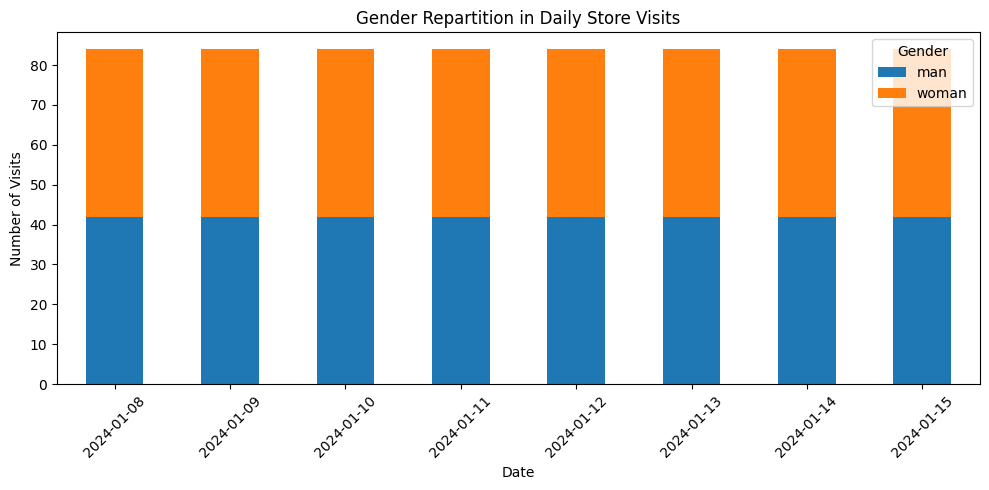

In [ ]:
# Visualisation de la répartition par genre des visites quotidiennes au magasin
gender_repartition.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Gender Repartition in Daily Store Visits')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

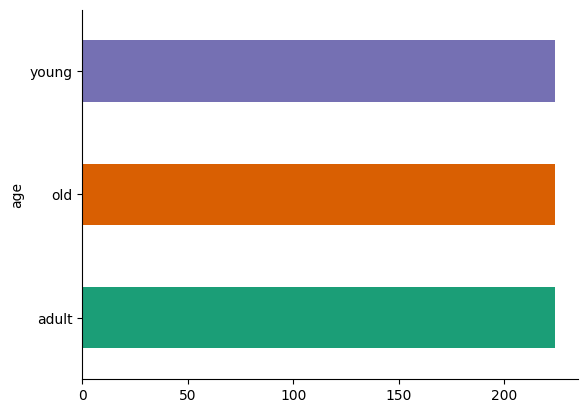

In [ ]:
data.groupby('age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)